In [92]:
import seaborn as sns
import csv
import pandas as pd

In [93]:
with open('../../output/media_coocurrence.csv', 'r') as file:
    content = csv.reader(file, quotechar='"')
    table = list(content)

In [94]:
table_media = [line for line in table[1:] if line != []]

In [95]:
media_plotting = pd.DataFrame(table_media, columns=table[0], dtype=float)

#media_plotting.columns = table[0]

media_plotting

/var/folders/fb/nrfz_2sx0kl2hzyj0vvvn47r0000gn/T/ipykernel_2296/211654592.py:1: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  media_plotting = pd.DataFrame(table_media, columns=table[0], dtype=float)


,Source,Controversy Occurrences,Total Occurrences Sampled,Total Occurrences
0,twitter.com,326.0,445.0,2300.0
1,www.youtube.com,306.0,667.0,5955.0
2,www.eldiario.es,293.0,772.0,7533.0
3,www.publico.es,190.0,552.0,5804.0
4,www.20minutos.es,118.0,504.0,6048.0
...,...,...,...,...
1626,science.slashdot.org,1.0,2.0,8.0
1627,www.malavida.com,1.0,6.0,189.0
1628,www.cordobabn.com,1.0,1.0,6.0
1629,losojosdehipatia.com.es,1.0,1.0,5.0


In [96]:
#media_plotting['relative'] = media_plotting['Controversy Occurrences']/media_plotting['Total Occurrences']

#media_plotting.sort_values(by='relative', ascending=False)


In [97]:
with open('../../output/types.csv', 'r') as file:
    content = csv.reader(file, quotechar='"')
    types = list(content)

In [98]:
types_media = pd.DataFrame(types[1:], columns=types[0], dtype=float)

/var/folders/fb/nrfz_2sx0kl2hzyj0vvvn47r0000gn/T/ipykernel_2296/3312173194.py:1: FutureWarning: Could not cast to float64, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  types_media = pd.DataFrame(types[1:], columns=types[0], dtype=float)


In [99]:
types_media

,Source,type
0,twitter.com,social network
1,www.youtube.com,social network
2,www.eldiario.es,general press
3,www.publico.es,general press
4,www.20minutos.es,general press
...,...,...
934,alt1040.com,specialized press
935,www.adslzone.net,specialized press
936,www.bbc.co.uk,general press
937,www.expansion.com,general press


In [100]:
result = pd.merge(media_plotting, types_media, how="left",on='Source')

In [101]:
result = media_plotting.reset_index().merge(types_media, how="left").set_index('index')

In [102]:
new_result = result.drop_duplicates()

In [103]:
final_result = new_result[new_result['type'].notna()]

In [104]:
print(len(media_plotting))

1631


In [105]:
print(len(final_result))

105


In [106]:
grouped = final_result.groupby('type')

In [107]:
controversial = grouped['Controversy Occurrences'].sum().tolist()


In [108]:
total = result.groupby('type')['Total Occurrences'].sum()
total_list = total.tolist()
types = total.index.tolist()

In [109]:
controversial

[122.0, 29.0, 2107.0, 120.0, 699.0, 308.0, 46.0]

In [110]:
types[:-1]

['blog',
 'fact-checker',
 'general press',
 'satirical',
 'social network',
 'specialized press']

In [111]:
ratio = [m/n for m, n in zip(controversial[:-1], total_list[:-1])]
ratio

[0.004733268671193017,
 0.014987080103359173,
 0.0029150646723768913,
 0.007822175868587446,
 0.008753365474923298,
 0.0029947106409458617]

In [112]:
controversial_sorted, types_sorted = (list(t) for t in zip(*sorted(zip(controversial[:-1], types[:-1]), reverse=True)))

In [113]:
controversial_sorted, ratio_sorted = (list(t) for t in zip(*sorted(zip(controversial[:-1], ratio), reverse=True)))

In [114]:
types_sorted

['general press',
 'social network',
 'specialized press',
 'blog',
 'satirical',
 'fact-checker']

In [115]:
controversial_sorted

[2107.0, 699.0, 308.0, 122.0, 120.0, 29.0]

In [116]:
ratio_sorted

[0.0029150646723768913,
 0.008753365474923298,
 0.0029947106409458617,
 0.004733268671193017,
 0.007822175868587446,
 0.014987080103359173]

In [117]:
import matplotlib.pyplot as plt

/Users/asier-gutierrez/.conda/envs/controversy-detection-model/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/asier-gutierrez/.conda/envs/controversy-detection-model/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


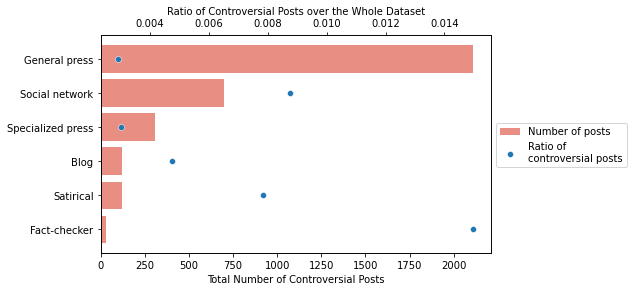

In [122]:
fig, ax1 = plt.subplots(figsize=(7,4)) # we create a figure that is going to contain subplots

ax2 = ax1.twiny() # we create a second twin axis that will share the x axis of the first!

sns.barplot(controversial_sorted, types_sorted, color = '#FA8072', ax = ax1, label="Number of posts")

sns.scatterplot(ratio_sorted, types_sorted, ax = ax2, label="Ratio of\ncontroversial posts")

ax1.set_xlabel("Total Number of Controversial Posts", fontsize=10)
#ax.set_yticklabels(media_classified.type)
ax2.set_xlabel("Ratio of Controversial Posts over the Whole Dataset", fontsize=10)
ax2.set_yticklabels(map(lambda x: x.capitalize(),types_sorted))

fig.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
ax2.get_legend().remove()

# invert for largest on top 
#ax1.invert_yaxis()
plt.savefig('../../output/visuals/media_counts.pdf', dpi=400, bbox_inches="tight")